### Trabalho final parte 1
#### Objetivos:
- Escolher uma curva do artigo;
- Reproduzir o resultado;
- Gerar variáveis aleatórias e obter a curva escolhida através da simulação de Monte Carlo

#### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#### Plotando a curva escolhida (imagem retirada do artigo):

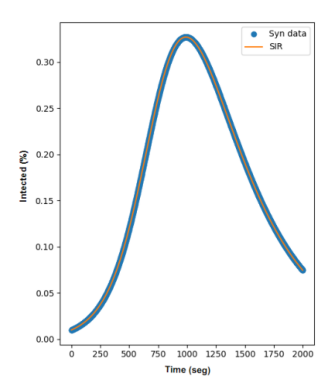

In [2]:
chosen_curve = mpimg.imread("chosen_curve.png")

plt.imshow(chosen_curve)
plt.axis('off')  
plt.show()

#### Definindo o número de pontos para Monte Carlo, intervalos de x e y, e valores de x no intervalo definido

In [3]:
num_points = 1000000
x_min = 0
x_max = 2000
y_min = 0
y_max = 0.35
x = np.linspace(x_min,x_max,1000)

### Definindo um dicionário com os três tipos de curvas

In [4]:
# Função que cria um dicionário com os três tipos de curvas selecionados a partir do array x 
def create_dictionary(x):
    curves = {
        'Polinomio Grau 4': 4.388698580768612e-13 * x**4 -1.7992789657753373e-9 * x**3 + 0.0000020824337301355358 * x**2 -0.0004445425814163986 * x + 0.03519370036409757,
        'Polinomio Grau 6': -4.82018710282859e-19 * x**6 +2.8099847809040743e-15 * x**5 -5.711631701614157e-12 * x**4 +4.440677306611257e-9 * x**3 -8.307747282992068e-7 * x**2 +0.00008402121083418335 * x + 0.014202903096756623,
        'Gaussiana': 0.012336026596604058 + 0.30803492826260603 * np.exp(-((x - 1074.6148652788315)**2) / (2 * 424.0305195250598**2))
    }
    return curves

#### Função para selecionar uma curva a partir do dicionário criado

In [5]:
# Função auxiliar que cria um dicionário e seleciona apenas a curva passada como parâmetro
def select_curve(x, curve_type):
    curves = create_dictionary(x)
    if curve_type in curves:
        return curves[curve_type]

#### Função que plota a curva selecionada

In [6]:
# Esta função plota a curva selecionada e os pontos gerados. Se nenhum parâmetro for passado, será plotada o polinômio de grau 4
def plot_curve(curve_type = 'Polinomio Grau 4'):

    # Gerando "num_points" números uniformemente distribuidos nos intervalos selecionados
    x_random = np.random.uniform(x_min, x_max, num_points)
    y_random = np.random.uniform(y_min, y_max, num_points)
    
    # Verifica quais pontos estão "dentro" do polinomio
    x_inside = []
    y_inside = []
    for i in range(num_points):
        if y_random[i] <= select_curve(x_random[i],curve_type):
            x_inside.append(x_random[i])
            y_inside.append(y_random[i])

    #Plotando o polinômio e os pontos
    plt.figure(figsize=(10, 6))
    plt.plot(x_inside, y_inside, 'bo', markersize=2, label='Pontos abaixo do polinômio')
    plt.plot(np.linspace(x_min, x_max, 1000), select_curve(np.linspace(x_min, x_max, 1000), curve_type), 'r-', label='Polinômio')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(curve_type)
    plt.legend()
    plt.grid(True)
    plt.show()

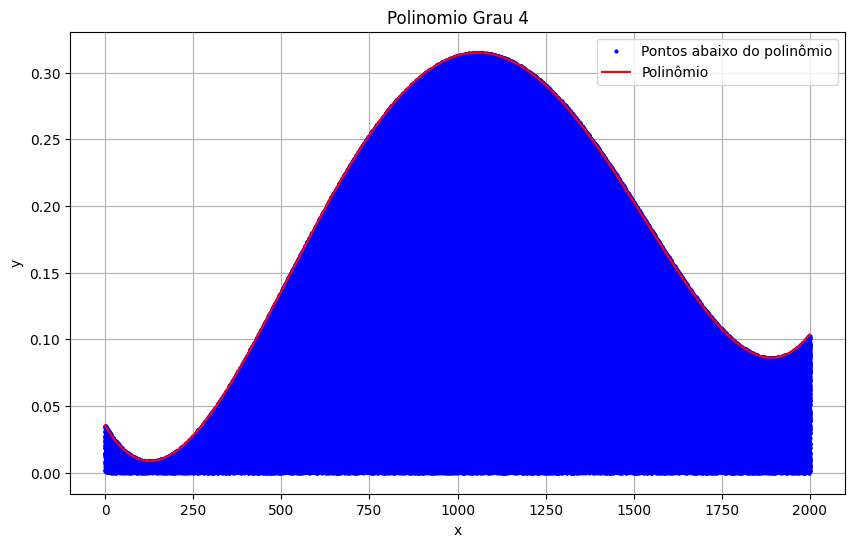

In [7]:
plot_curve('Polinomio Grau 4')

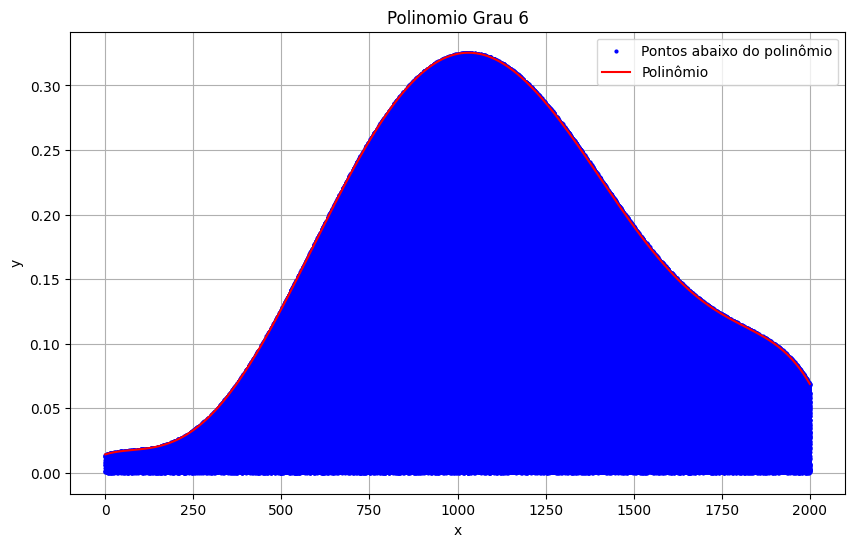

In [8]:
plot_curve('Polinomio Grau 6')

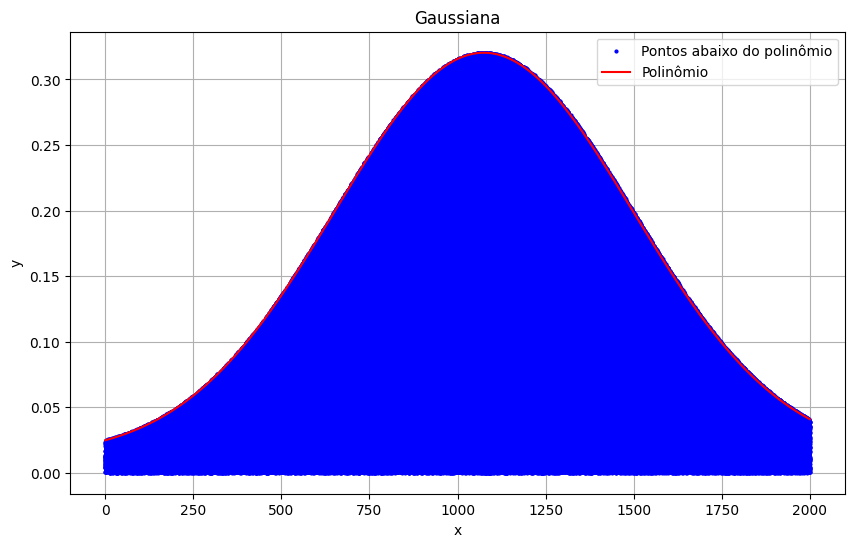

In [9]:
plot_curve('Gaussiana')